In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

In [2]:
pi = np.pi #Pi value
A = 1  #Amplitude of the signal
fm= 10  #Meassage Frequency
Tsig = 1 / fm   #Time Period 
t = np.arange(0, 2 * Tsig, 0.01 * Tsig)  #Plotting points for the signal

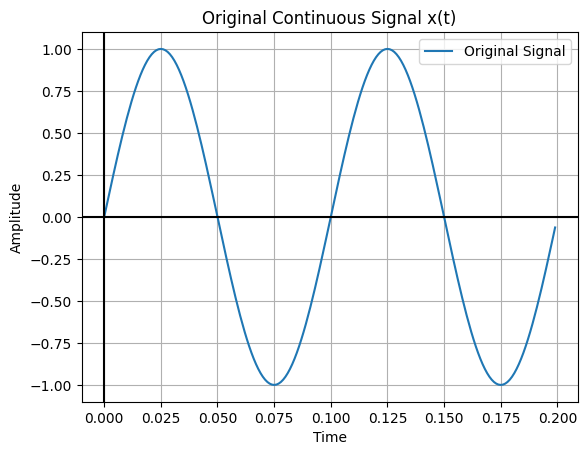

In [3]:
x= A * np.sin(2 * pi * fm * t)  #Original Signal
plt.plot(t,x)                   #Plotting of the signal
plt.title("Original Continuous Signal x(t)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(['Original Signal'])
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid(True)
plt.show()
temp_sig=[i for i in x]  #copy of original signal
x_org=[i for i in x]     #copy of original signal

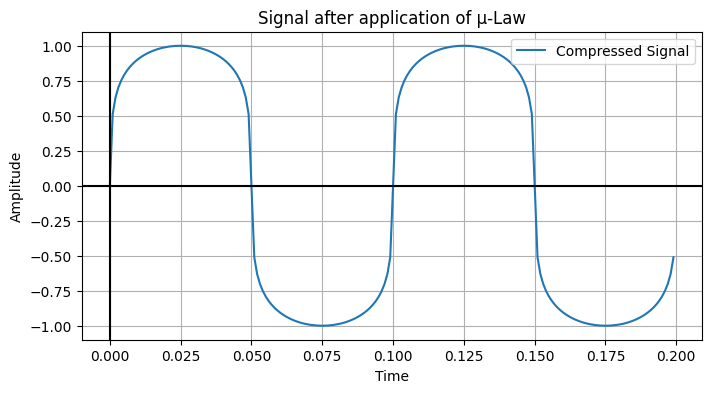

In [4]:
#μ-Law
u = 255  #Standard value
x = np.sign(temp_sig) * np.log(1 + (u * np.abs(temp_sig))) / np.log(1 + u) #Compressed signal
plt.figure(figsize= (8 , 4))
plt.plot(t,x) #Plotting of the compresseed signal
plt.title("Signal after application of μ-Law")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend(['Compressed Signal'], loc = 'upper right')
plt.axhline(y = 0, color = 'black')
plt.axvline(x= 0, color = 'black')

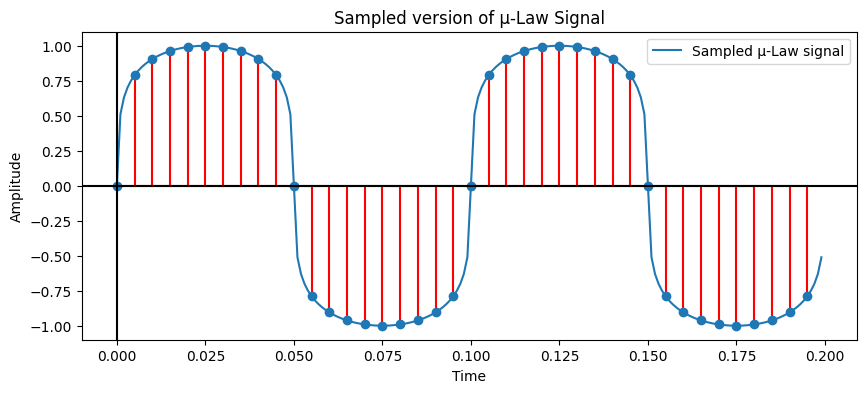

In [5]:
M = 20          #Nqyuist constant
fs = M * fm     #Sampling Frequency
ts = np.arange(0, 2 * Tsig, 1 / fs) #plotting points for sampled signal
xs = np.zeros(len(ts))  #List for storing the sampled signal
for i in range(len(ts)): #Process for storing the values at the sampling frequency
    xs[i] = x[i * 5]

plt.figure(figsize=(10,4))
plt.plot(t,x)
plt.stem(ts,xs,"r")
plt.title("Sampled version of μ-Law Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.legend(['Sampled μ-Law signal'], loc= 'upper right')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.show()

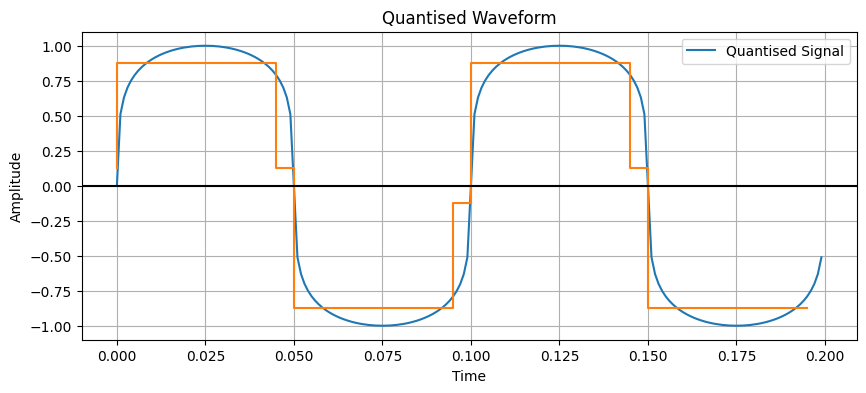

In [6]:
#Quantization
N = 3  #Bits
L = 2 ** N  #Levels
delta = 2 * A / L  #Step size

levels = np.arange( -A + delta / 2, A, delta)  #List for storing the levels

x_qnt = np.zeros(len(xs))  #List for storing the quantised signal
for i in range(len(xs)):
    index=math.floor((xs[i] - (-A) ) / delta)
    if index == L:
        index -= 1
    x_qnt[i] = levels[index]

plt.figure(figsize=(10,4))
plt.plot(t,x)
plt.step(ts,x_qnt)
plt.title("Quantised Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(['Quantised Signal'])
plt.axhline(y = 0, color = 'black')
plt.grid(True)

In [7]:
#This is to generate the binary codes required for 3 bits
code = []
for i in range(L):
    num = i
    code_word =""
    for j in range(N):
        if num&(1 << j) == 0:
            code_word += "0"
        else:
            code_word += "1"
    code.append(code_word)

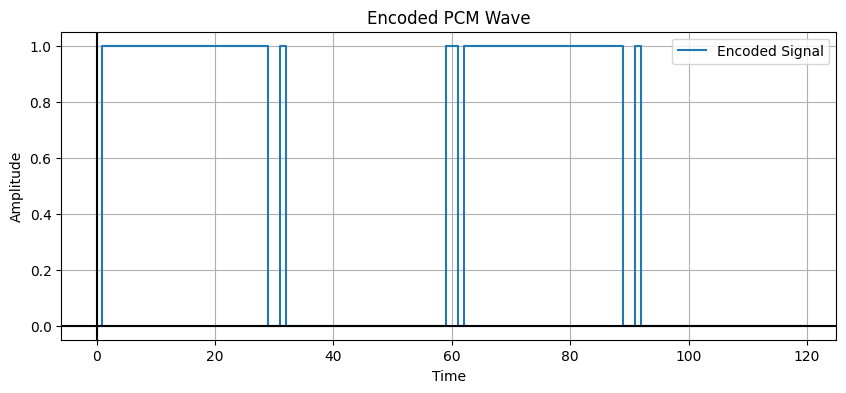

In [8]:
#Encoding
#The following for loop is used for storng the pcm values of the signal in the form of a string
pcm=""
for i in range(len(x_qnt)):
    index=math.floor((x_qnt[i] - (-A)) / delta)
    pcm += code[index]

pcm_sig = [int(i) for i in list(pcm)]   #List for storing the pcm signal

plt.figure(figsize=(10,4))
plt.step(np.arange(0,len(pcm_sig)),pcm_sig)
plt.title("Encoded PCM Wave")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.legend(['Encoded Signal'])
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid(True)


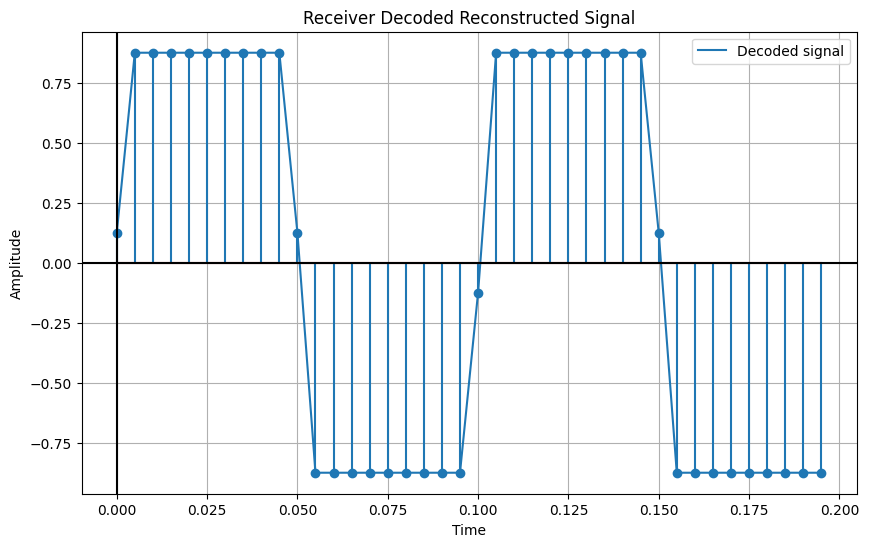

In [9]:
#Receiver Reconstruction
code_dict={}
for i in range(len(code)):
    code_dict[code[i]]=levels[i]
x_rec=[]
for i in range(0,len(pcm),N):
    x_rec.append(code_dict[pcm[i:i+N]])
plt.figure(figsize=(10,6))
plt.plot(ts,x_rec)
plt.stem(ts,x_rec)
plt.title("Receiver Decoded Reconstructed Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(['Decoded signal'])
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black' )
temp_sig=[i for i in x_rec]

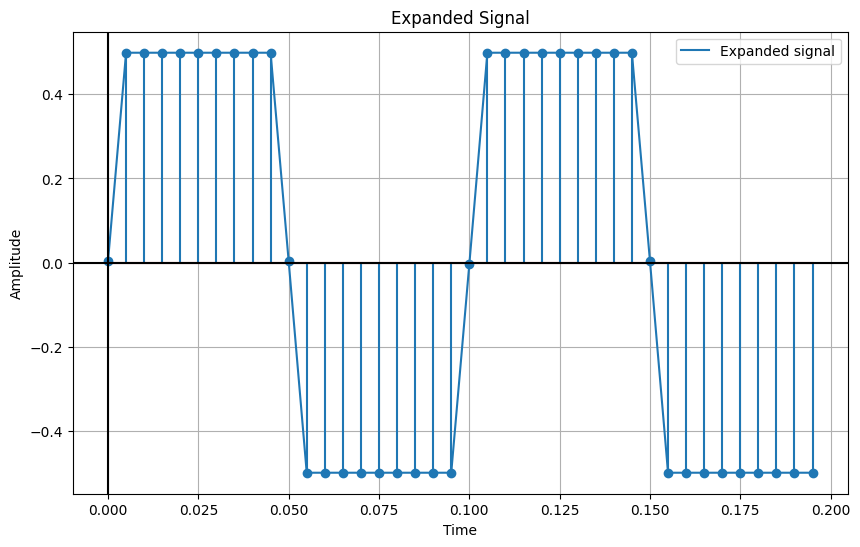

In [10]:
#Inverse μ-Law
x_rec=np.sign(temp_sig)*(((1+u)**np.abs(temp_sig))-1)/u
plt.figure(figsize=(10,6))
plt.plot(ts,x_rec)
plt.stem(ts,x_rec)
plt.title("Expanded Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(['Expanded signal'])
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black' )


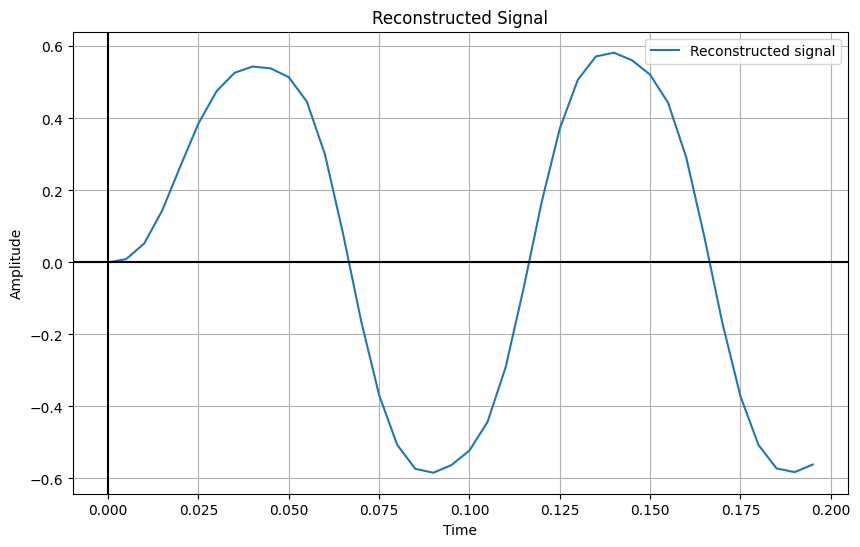

In [11]:
[num,den]=signal.butter(3,2*fm/(fs/2))
x_rec=signal.lfilter(num,den,x_rec)
plt.figure(figsize=(10,6))
plt.plot(ts,x_rec)
plt.title("Reconstructed Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(['Reconstructed signal'])
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black' )

In [12]:
#Practical Calculation of SNR
NUM=0
DEN=0
for i in range(len(xs)):
    NUM+=xs[i]**2
for i in range(len(x_qnt)):
    DEN+=(xs[i]-x_qnt[i])**2
SQNR=NUM/DEN
print(SQNR)

SQNRdb=10*math.log10(SQNR)
print(SQNRdb)


85.96916908890722
19.343427292060184


In [13]:
#Theoretical Calculation of SNR
power=(np.linalg.norm(x_org,1)**2)/len(x_org)
sqnr=power+6.02*N+4.77
print(sqnr)

sqnr_db=10*math.log10(sqnr)
print(sqnr_db)

103.83361884515062
20.163379904588613
